# Clustering

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import sys

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import openpyxl
import umap
from itertools import cycle

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer

sys.path.append('../src')
from utilities import baseline_accuracy
from utilities import dataplotmelt
from utilities import test_model
from utilities import nested_crossvalidation
from utilities import nested_ROC_plot
from utilities import montecarlo_crossvalidation
from utilities import model_optimization
from utilities import gridsearch_bias

/Users/mauropazmino/Documents/University/TseTse_Project/Pilot/tsetse_MIRS/.tsetse_mirs/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/mauropazmino/Documents/University/TseTse_Project/Pilot/tsetse_MIRS/.tsetse_mirs/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-usin

In [3]:
#tsetse_data = pd.read_csv("../data/raw/TseTse_finaldataset.dat", sep='\t')
tsetse_data = pd.read_csv("../data/raw/TseTse_finaldatasetclean.csv")
tsetse_data.rename(columns={"Cat1":"Plate", "Cat3":"Sex", "Cat4":"Age", "Cat5":"Tissue"}, inplace=True)
tsetse_data['Tissue'] = tsetse_data['Tissue'].str.replace("T", 'Thorax')
tsetse_data['Tissue'] = tsetse_data['Tissue'].str.replace("H", 'Head')
tsetse_data['Tissue'] = tsetse_data['Tissue'].str.replace("A", 'Abdomen')

In [4]:
tsetse_data_copy = tsetse_data.copy()

In [5]:
dList=['Plate','Sex', 'Age', 'ID.1', 'Tissue','ID']
descriptorsDF = tsetse_data_copy[dList]

# Females

In [6]:
tsetse_females_thorax = tsetse_data_copy.loc[(descriptorsDF['Sex'] == 'f') & (descriptorsDF['Tissue'] == 'Thorax')]

tsetse_females_head = tsetse_data_copy.loc[(descriptorsDF['Sex'] == 'f') & (descriptorsDF['Tissue'] == 'Head')]

In [7]:
tsetse_females_abdomen = tsetse_data_copy.loc[(descriptorsDF['Sex'] == 'f') & (descriptorsDF['Tissue'] == 'Abdomen')]

In [8]:
tsetse_females_thorax_copy = tsetse_females_thorax.copy()
tsetse_females_head_copy = tsetse_females_head.copy()



In [9]:
tsetse_females_abdomen_copy =tsetse_females_abdomen.copy()

In [10]:
dList=['Plate','Sex', 'Age', 'ID.1', 'Tissue','ID']
descriptorsDF_thorax = tsetse_females_thorax[dList]
tsetse_females_thorax_copy.drop(dList, axis=1,inplace=True)


descriptorsDF_head = tsetse_females_head_copy[dList]
tsetse_females_head_copy.drop(dList, axis=1,inplace=True)

In [11]:
waveNumslist = tsetse_females_thorax_copy.columns.values.tolist()
wavenumbers = [int(x) for x in waveNumslist]

In [12]:
y_labels_head = descriptorsDF_head['Age']
y_labels_thorax = descriptorsDF_thorax['Age']

In [13]:
# females head
reducer = umap.UMAP(n_neighbors = 30, transform_seed=123, min_dist=0.0)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(tsetse_females_head_copy)
embedding_head = reducer.fit_transform(features_scaled)

In [14]:
# Females thorax
reducer = umap.UMAP(n_neighbors = 30, transform_seed=123, min_dist=0.0)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(tsetse_females_thorax_copy)
embedding_thorax= reducer.fit_transform(features_scaled)

# Males

In [15]:
# males
tsetse_males_thorax = tsetse_data_copy.loc[(descriptorsDF['Sex'] == 'm') & (descriptorsDF['Tissue'] == 'Thorax')]

tsetse_males_head = tsetse_data_copy.loc[(descriptorsDF['Sex'] == 'm') & (descriptorsDF['Tissue'] == 'Head')]

tsetse_males_thorax_copy = tsetse_males_thorax.copy()
tsetse_males_head_copy = tsetse_males_head.copy()

dList=['Plate','Sex', 'Age', 'ID.1', 'Tissue','ID']
descriptorsDF_thorax_males = tsetse_males_thorax[dList]
tsetse_males_thorax_copy.drop(dList, axis=1,inplace=True)


descriptorsDF_head_males = tsetse_males_head_copy[dList]
tsetse_males_head_copy.drop(dList, axis=1,inplace=True)



In [16]:
#males head
reducer = umap.UMAP(n_neighbors = 30, transform_seed=123, min_dist=0.0)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(tsetse_males_head_copy)
embedding_head_male = reducer.fit_transform(features_scaled)

In [17]:
#males thorax
reducer = umap.UMAP(n_neighbors = 30, transform_seed=123, min_dist=0.0)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(tsetse_males_thorax_copy)
embedding_thorax_male= reducer.fit_transform(features_scaled)

# Sex prediction

In [18]:
tsetse_data_sameages = tsetse_data[(tsetse_data["Age"]!= '3d')]
tsetse_data_sameages_copy = tsetse_data_sameages.copy()

dList=['Plate','Sex', 'Age', 'ID.1', 'Tissue','ID']
descriptorsDF_sameage = tsetse_data_sameages_copy[dList]
tsetse_data_sameages_copy.drop(dList, axis=1,inplace=True)

In [19]:
tsetse_head = tsetse_data_sameages_copy[(descriptorsDF_sameage['Tissue'] == 'Head')]
tsetse_thorax = tsetse_data_sameages_copy[(descriptorsDF_sameage['Tissue'] == 'Thorax')]

In [20]:
# umap

reducer = umap.UMAP(n_neighbors = 30, transform_seed=123, min_dist=0.0)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(tsetse_head)
embedding_head_sex = reducer.fit_transform(features_scaled)

# thorax
reducer = umap.UMAP(n_neighbors = 30, transform_seed=123, min_dist=0.0)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(tsetse_thorax)
embedding_thorax_sex = reducer.fit_transform(features_scaled)

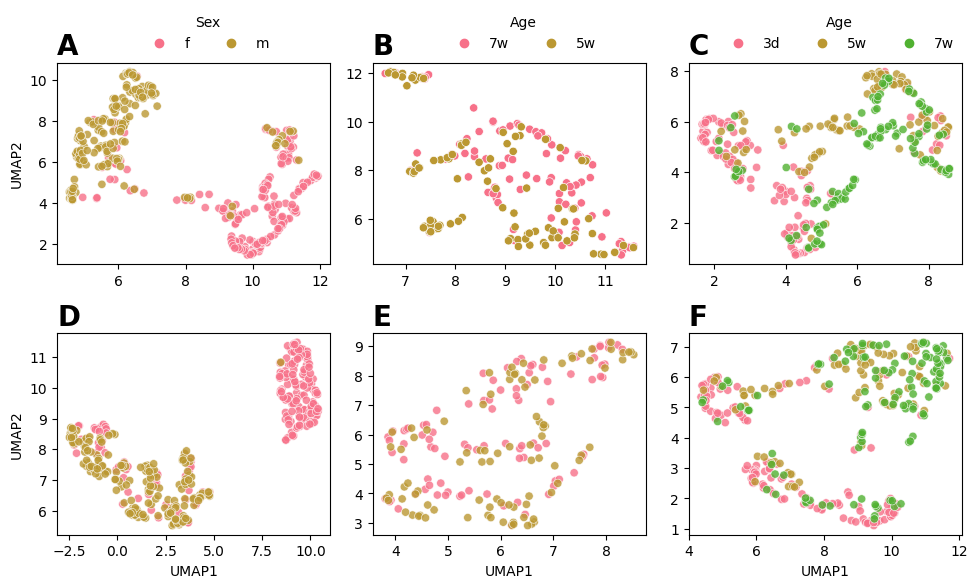

In [106]:
sn.set_palette("husl")

fig, ((ax, ax2, ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(10,6))

#MALES AGE

sn.scatterplot(x=embedding_head_male[:,0], 
               y=embedding_head_male[:,1], 
               hue=descriptorsDF_head_males['Age'],
               legend=True, 
               ax=ax2)

sn.scatterplot(x=embedding_thorax_male[:,0], y=embedding_thorax_male[:,1], 
               hue=descriptorsDF_thorax_males['Age'],
               alpha=0.8,
               legend=False,
               ax=ax5)

# FEMALES AGE
# head
sn.scatterplot(x=embedding_head[:,0], y=embedding_head[:,1], 
               alpha=0.8, hue=descriptorsDF_head['Age'],ax=ax3, legend=True)


# thorax
sn.scatterplot(x=embedding_thorax[:,0], y=embedding_thorax[:,1], 
               alpha=0.8, 
               hue=descriptorsDF_thorax['Age'],
               legend=False,
               ax=ax6)

ax.set_ylabel("UMAP2")
ax4.set_ylabel("UMAP2")

ax4.set_xlabel("UMAP1")
ax5.set_xlabel("UMAP1")
ax6.set_xlabel("UMAP1")
#ax3.legend( bbox_to_anchor=(0.5, 0.05, 0.3, 0.1),ncols=3,frameon=False)

labeles = ["A", "B", "C", "D", "E", "F"]
axes = fig.get_axes()
for a, l in zip(axes, labeles):
    a.set_title(l, loc='left', fontsize=20, fontweight='bold')

# SEX

sn.scatterplot(x=embedding_head_sex[:,0], 
               y=embedding_head_sex[:,1], 
               hue=descriptorsDF_sameage[descriptorsDF_sameage['Tissue'] == 'Head']['Sex'], 
               alpha=0.8, 
               ax=ax)
ax.legend(ncol=2, bbox_to_anchor=(0.05,1.1,1,.1), loc='center', frameon=False, title='Sex')
ax2.legend(ncol=2, bbox_to_anchor=(0.05,1.1,1,.1), loc='center', frameon=False, title='Age')
ax3.legend(ncol=3, bbox_to_anchor=(0.05,1.1,1,.1), loc='center', frameon=False, title='Age')

sn.scatterplot(x=embedding_thorax_sex[:,0], y=embedding_thorax_sex[:,1], 
               hue=descriptorsDF_sameage[descriptorsDF_sameage['Tissue'] == 'Thorax']['Sex'], 
               alpha=0.8, 
               legend=False, 
               ax=ax4)

plt.tight_layout()

#plt.savefig("../results/plots/CLUSTERING_FINAL.png", dpi=900)

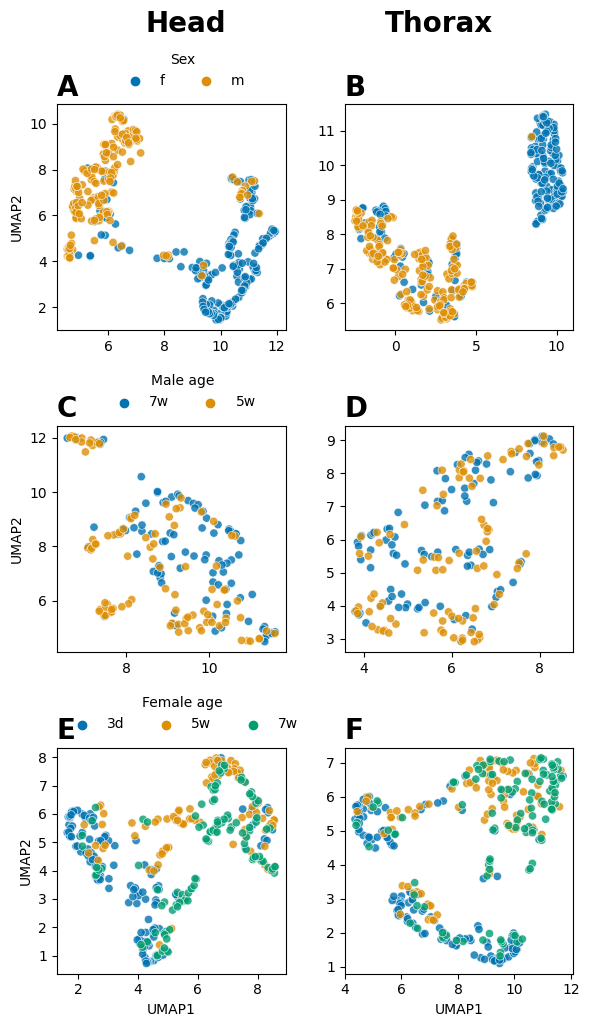

In [60]:
sn.set_palette("colorblind")

fig, ((ax, ax2), (ax3,ax4),(ax5,ax6)) = plt.subplots(3,2, figsize=(6,10))



sn.scatterplot(x=embedding_head_male[:,0], y=embedding_head_male[:,1], 
               hue=descriptorsDF_head_males['Age'],
               alpha=0.8,
               legend=True, 
               ax=ax3)

sn.scatterplot(x=embedding_thorax_male[:,0], y=embedding_thorax_male[:,1], 
               hue=descriptorsDF_thorax_males['Age'],
               alpha=0.8,
               legend=False,
               ax=ax4)



sn.scatterplot(x=embedding_head[:,0], y=embedding_head[:,1], 
               alpha=0.8, hue=descriptorsDF_head['Age'],ax=ax5, legend=True)

sn.scatterplot(x=embedding_thorax[:,0], y=embedding_thorax[:,1], 
               alpha=0.8, hue=descriptorsDF_thorax['Age'],legend=False,ax=ax6)


sn.scatterplot(x=embedding_head_sex[:,0], y=embedding_head_sex[:,1], 
               hue=descriptorsDF_sameage[descriptorsDF_sameage['Tissue'] == 'Head']['Sex'], 
               alpha=0.8, 
               ax=ax)

sn.scatterplot(x=embedding_thorax_sex[:,0], y=embedding_thorax_sex[:,1], 
               hue=descriptorsDF_sameage[descriptorsDF_sameage['Tissue'] == 'Thorax']['Sex'], 
               alpha=0.8, 
               legend=False, 
               ax=ax2)

labeles = ["A", "B", "C", "D", "E", "F"]
axes = fig.get_axes()
for a, l in zip(axes, labeles):
    a.set_title(l, loc='left', fontsize=20, fontweight='bold')

ax.set_ylabel("UMAP2")
ax3.set_ylabel("UMAP2")
ax5.set_ylabel("UMAP2")

ax5.set_xlabel("UMAP1")
ax6.set_xlabel("UMAP1")


fig.text(0.25,1,s="Head", fontsize=20, fontweight='bold')
fig.text(0.65,1,s="Thorax", fontsize=20, fontweight='bold')


ax.legend(ncol=2, bbox_to_anchor=(0.05,1.1,1,.1), loc='center', frameon=False, title='Sex')
ax3.legend(ncol=2, bbox_to_anchor=(0.05,1.1,1,.1), loc='center', frameon=False, title='Male age')

ax5.legend(ncol=3, bbox_to_anchor=(0.05,1.1,1,.1), loc='center', frameon=False, title='Female age')

plt.tight_layout()

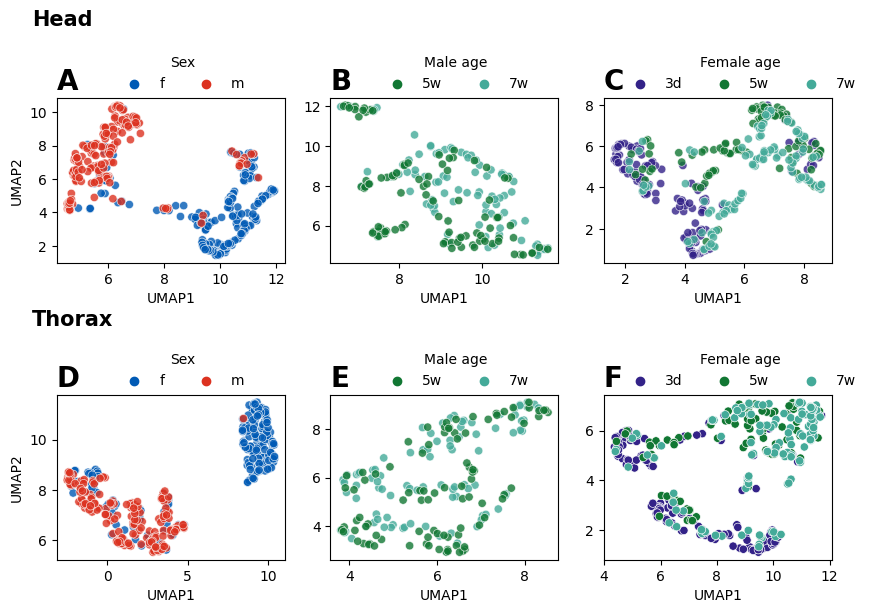

In [137]:
colorpal = ['#332288','#117733','#44AA99']
colorpal2 = ['#117733','#44AA99']

colorsex = ['#005AB5','#DC3220']
markpal = ['X', 'o','s']
sn.set_palette(sn.color_palette(colorpal))

fig, ((ax, ax2, ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(10,6))

plt.subplots_adjust(hspace=0.8)

#MALES AGE

sn.scatterplot(x=embedding_head_male[:,0], y=embedding_head_male[:,1], 
               hue=descriptorsDF_head_males['Age'],
               hue_order=['5w','7w'],
               alpha=0.8,
               palette = colorpal2,
               legend=True, 
               ax=ax2)

sn.scatterplot(x=embedding_thorax_male[:,0], y=embedding_thorax_male[:,1], 
               hue=descriptorsDF_thorax_males['Age'],
               hue_order=['5w','7w'],
               palette = colorpal2,
               alpha=0.8,
               legend=True,
               ax=ax5)

# FEMALES AGE
# head
sn.scatterplot(x=embedding_head[:,0], y=embedding_head[:,1], 
               alpha=0.8, hue=descriptorsDF_head['Age'],ax=ax3, legend=True)


# thorax
sn.scatterplot(x=embedding_thorax[:,0], 
               y=embedding_thorax[:,1], 
               alpha=1, 
               hue=descriptorsDF_thorax['Age'],
               markers = markpal,
               legend=True,ax=ax6)



# SEX

sn.scatterplot(x=embedding_head_sex[:,0], 
               y=embedding_head_sex[:,1], 
               hue=descriptorsDF_sameage[descriptorsDF_sameage['Tissue'] == 'Head']['Sex'],
               palette = colorsex, 
               alpha=0.8, 
               ax=ax)


sn.scatterplot(x=embedding_thorax_sex[:,0], y=embedding_thorax_sex[:,1], 
               hue=descriptorsDF_sameage[descriptorsDF_sameage['Tissue'] == 'Thorax']['Sex'],
               alpha=0.8,
               palette = colorsex,
               legend=True, 
               ax=ax4)


ax.legend(ncol=2, bbox_to_anchor=(0.05,1.1,1,.1), loc='center', frameon=False, title='Sex')
ax2.legend(ncol=2, bbox_to_anchor=(0.05,1.1,1,.1), loc='center', frameon=False, title='Male age')
ax3.legend(ncol=3, bbox_to_anchor=(0.10,1.1,1,.1), loc='center', frameon=False, title='Female age')

ax4.legend(ncol=2, bbox_to_anchor=(0.05,1.1,1,.1), loc='center', frameon=False, title='Sex')
ax5.legend(ncol=2, bbox_to_anchor=(0.05,1.1,1,.1), loc='center', frameon=False, title='Male age')
ax6.legend(ncol=3, bbox_to_anchor=(0.10,1.1,1,.1), loc='center', frameon=False, title='Female age')

fig.text(0.1,1,s="Head", fontsize=15, fontweight='bold')
fig.text(0.1,0.5,s="Thorax", fontsize=15, fontweight='bold')

ax.set_ylabel("UMAP2")
ax4.set_ylabel("UMAP2")

ax4.set_xlabel("UMAP1")
ax5.set_xlabel("UMAP1")
ax6.set_xlabel("UMAP1")

ax.set_xlabel("UMAP1")
ax2.set_xlabel("UMAP1")
ax3.set_xlabel("UMAP1")

#ax3.legend( bbox_to_anchor=(0.5, 0.05, 0.3, 0.1),ncols=3,frameon=False)

labeles = ["A", "B", "C", "D", "E", "F"]
axes = fig.get_axes()
for a, l in zip(axes, labeles):
    a.set_title(l, loc='left', fontsize=20, fontweight='bold')

plt.savefig("../results/plots/CLUSTERING_FINAL.png", dpi=900)


In [71]:
tsetse_females = tsetse_data_copy.loc[(descriptorsDF['Sex'] == 'f')]

In [72]:
dList=['Plate','Sex', 'Age', 'ID.1', 'Tissue','ID']

descriptorsDF_females_alltissues = tsetse_females[dList]

tsetse_females_copy = tsetse_females.copy()

tsetse_females_copy.drop(dList, axis=1,inplace=True)

In [74]:
reducer = umap.UMAP(n_neighbors = 30, transform_seed=123, min_dist=0.0)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(tsetse_females_copy)
embedding_females = reducer.fit_transform(features_scaled)

<Axes: >

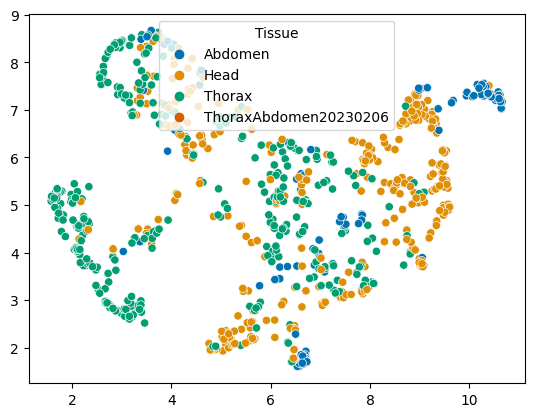

In [79]:
sn.scatterplot(x=embedding_females[:,0], y=embedding_females[:,1],
               hue=descriptorsDF_females_alltissues['Tissue'])

In [82]:
y_labels = descriptorsDF_females_alltissues["Tissue"]
y_labels

0      Abdomen
1         Head
2       Thorax
3      Abdomen
4         Head
        ...   
797     Thorax
798       Head
799     Thorax
800       Head
801     Thorax
Name: Tissue, Length: 802, dtype: object

In [83]:
colors = sn.color_palette("colorblind") 

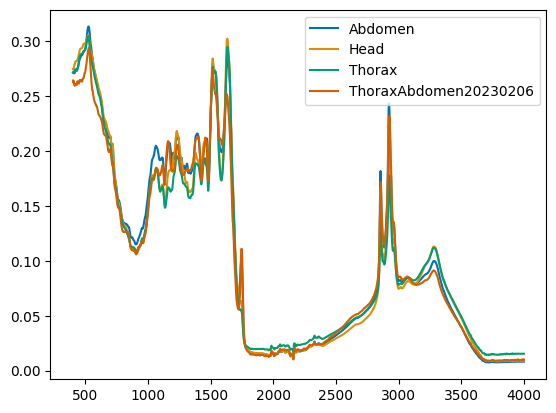

In [86]:
fig, ax = plt.subplots()

for i, c in zip(np.unique(y_labels), colors):
    sn.lineplot(x=wavenumbers, y=np.mean(tsetse_females_copy[y_labels == i], axis=0), label=i, color=c,ax=ax)

In [88]:
abdomen = pd.read_excel("../data/processed/abdomen_dataexample.xlsx")
abdomen

,Tissue,4000,3998,3996,3994,3992,3990,3988,3986,3984,...,418,416,414,412,410,408,406,404,402,selected
0,A,0.01030,0.01029,0.01027,0.01024,0.01019,0.01016,0.01016,0.01016,0.01023,...,0.17600,0.17609,0.17609,0.17532,0.17393,0.17268,0.17255,0.17383,0.17489,x
1,A,0.00618,0.00611,0.00612,0.00617,0.00623,0.00630,0.00630,0.00636,0.00635,...,0.29814,0.29744,0.29744,0.29674,0.29774,0.30119,0.30455,0.30618,0.30654,x
2,A,0.01336,0.01337,0.01340,0.01342,0.01347,0.01354,0.01354,0.01361,0.01360,...,0.22714,0.22738,0.22738,0.22856,0.22988,0.22972,0.23004,0.23107,0.22941,x
3,A,0.00757,0.00776,0.00788,0.00787,0.00771,0.00750,0.00750,0.00742,0.00759,...,0.19822,0.19883,0.19883,0.19839,0.19692,0.19522,0.19455,0.19466,0.19471,x
4,A,0.00574,0.00564,0.00551,0.00537,0.00529,0.00539,0.00539,0.00558,0.00568,...,0.29342,0.29454,0.29454,0.29456,0.29481,0.29662,0.29802,0.29779,0.29761,x
5,A,0.01194,0.01188,0.01183,0.01180,0.01176,0.01169,0.01169,0.01171,0.01183,...,0.11676,0.11816,0.11816,0.11846,0.11827,0.11879,0.11923,0.11837,0.11779,x
6,A,0.01072,0.01071,0.01070,0.01077,0.01080,0.01076,0.01076,0.01066,0.01058,...,0.17288,0.17408,0.17408,0.17437,0.17390,0.17260,0.17244,0.17398,0.17473,x
7,A,0.00531,0.00524,0.00531,0.00548,0.00559,0.00562,0.00562,0.00559,0.00539,...,0.19823,0.19776,0.19776,0.19841,0.19803,0.19585,0.19383,0.19349,0.19427,x
8,A,0.00487,0.00479,0.00479,0.00491,0.00503,0.00506,0.00506,0.00491,0.00470,...,0.30629,0.30686,0.30686,0.30748,0.30593,0.30310,0.30228,0.30289,0.30260,x
9,A,0.01527,0.01538,0.01534,0.01525,0.01527,0.01542,0.01542,0.01553,0.01552,...,0.11800,0.11812,0.11812,0.11826,0.11834,0.11756,0.11589,0.11516,0.11591,x


In [109]:
abdomen[4000]

0    0.01030
1    0.00618
2    0.01336
3    0.00757
4    0.00574
5    0.01194
6    0.01072
7    0.00531
8    0.00487
9    0.01527
Name: 4000, dtype: float64

In [110]:
abdomen_x = abdomen.loc[:,4000:402]

In [ ]:
 y=abdomen_x.iloc[:,0

In [118]:
tsetse_males_thorax_copy

,4000,3998,3996,3994,3992,3990,3988,3986,3984,3982,...,420,418,416,414,412,410,408,406,404,402
804,0.02346,0.02358,0.02368,0.02376,0.02389,0.02409,0.02409,0.02417,0.02404,0.02383,...,0.22678,0.22688,0.22672,0.22672,0.22609,0.22494,0.22441,0.22482,0.22513,0.22522
807,0.02449,0.02448,0.02448,0.02449,0.02450,0.02448,0.02448,0.02443,0.02433,0.02429,...,0.23910,0.24004,0.23966,0.23966,0.23792,0.23698,0.23804,0.24017,0.24124,0.24092
810,0.02656,0.02657,0.02663,0.02666,0.02664,0.02662,0.02662,0.02653,0.02634,0.02622,...,0.21447,0.21699,0.21786,0.21786,0.21561,0.21310,0.21308,0.21447,0.21393,0.21188
813,0.02635,0.02623,0.02618,0.02624,0.02631,0.02627,0.02627,0.02622,0.02630,0.02633,...,0.23688,0.23730,0.23610,0.23610,0.23452,0.23392,0.23437,0.23418,0.23352,0.23394
816,0.02793,0.02791,0.02798,0.02806,0.02808,0.02801,0.02801,0.02796,0.02801,0.02810,...,0.26857,0.26871,0.26776,0.26776,0.26647,0.26611,0.26608,0.26538,0.26501,0.26536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,0.02445,0.02451,0.02447,0.02433,0.02429,0.02437,0.02437,0.02442,0.02444,0.02443,...,0.26104,0.26145,0.25828,0.25828,0.25569,0.25573,0.25623,0.25513,0.25484,0.25814
1182,0.02195,0.02193,0.02179,0.02162,0.02163,0.02181,0.02181,0.02196,0.02203,0.02203,...,0.27453,0.27485,0.27227,0.27227,0.27121,0.27312,0.27545,0.27579,0.27525,0.27636
1184,0.01927,0.01936,0.01918,0.01890,0.01885,0.01899,0.01899,0.01901,0.01902,0.01910,...,0.22796,0.22786,0.22435,0.22435,0.22228,0.22227,0.22248,0.22223,0.22338,0.22705
1186,0.02030,0.02035,0.02032,0.02029,0.02042,0.02062,0.02062,0.02066,0.02063,0.02059,...,0.28330,0.28263,0.28076,0.28076,0.28031,0.28208,0.28330,0.28237,0.28173,0.28348


Text(1, 0.4, 'Abdomen')

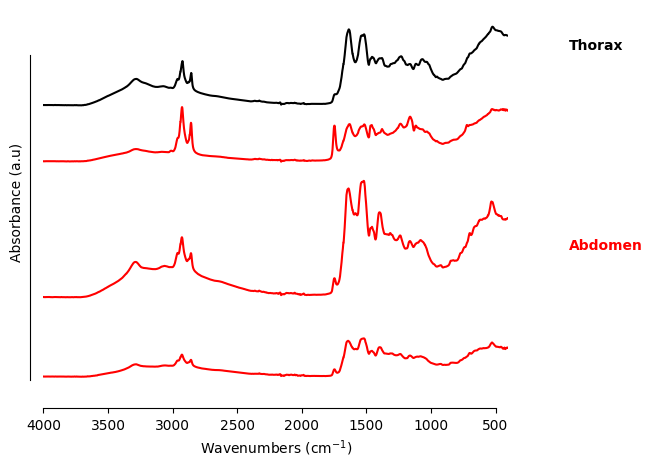

In [176]:
fig, ax = plt.subplots(figsize=(6, 5))
sn.lineplot(x=wavenumbers, y=np.mean(tsetse_females_thorax_copy, axis=0)+1, color='k',ax=ax)
sn.lineplot(x=wavenumbers, y=abdomen_x.iloc[3,:]+0.8, color='r', ax=ax)
sn.lineplot(x=wavenumbers, y=abdomen_x.iloc[4,:]+0.3, color='r',ax=ax)
sn.lineplot(x=wavenumbers, y=abdomen_x.iloc[5,:], color='r',ax=ax)

ax.set_xlim(4000, 400)

sn.despine(trim=True, ax=ax, offset=10)

ax.set_yticks([])

ax.set_ylabel("Absorbance (a.u)")
ax.set_xlabel("Wavenumbers (cm$^{-1}$)")

fig.text(x=1, y=0.8, s='Thorax', fontweight='bold')
fig.text(x=1, y=0.4, s='Abdomen', color='r',fontweight='bold')




In [198]:
tsetse_data_copy_onlywvns = tsetse_data_copy.loc[:,'1800':"900"]

In [199]:
pca = PCA(n_components=2)
scaler_pca = StandardScaler()

X_scaled = scaler_pca.fit_transform(tsetse_data_copy_onlywvns)
X_pca = pca.fit_transform(tsetse_data_copy_onlywvns)

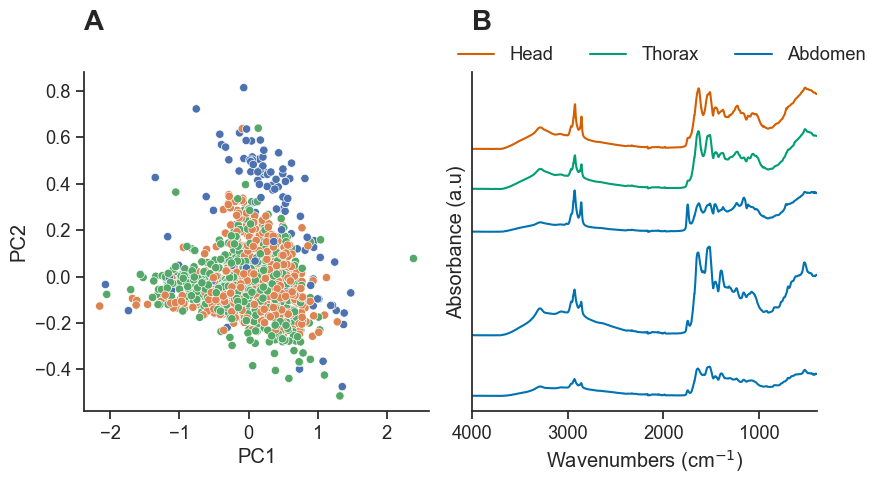

In [298]:

plt.rcParams['font.size'] = 12
#sn.set(font_scale=1.2)
sn.set_style('ticks')

fig, (ax, ax2) = plt.subplots(1,2, figsize=(9,5), tight_layout=True)
sn.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=tsetse_data_copy["Tissue"], ax=ax, legend=False)
sn.despine(ax=ax)



sn.lineplot(x=wavenumbers, y=np.mean(tsetse_females_head_copy, axis=0)+1.2, color='#d55e00',ax=ax2, label='Head')
sn.lineplot(x=wavenumbers, y=np.mean(tsetse_females_thorax_copy, axis=0)+1, color='#009e73',ax=ax2, label='Thorax')
sn.lineplot(x=wavenumbers, y=abdomen_x.iloc[3,:]+0.8, color='#0072b2', ax=ax2, label="Abdomen")
sn.lineplot(x=wavenumbers, y=abdomen_x.iloc[4,:]+0.3, color='#0072b2',ax=ax2)
sn.lineplot(x=wavenumbers, y=abdomen_x.iloc[5,:], color='#0072b2',ax=ax2)

ax2.legend(ncol=3, bbox_to_anchor=(0.05,1,1,.1), loc='center', frameon=False)
#ax.legend(ncol=3, bbox_to_anchor=(0.05,1,1,.1), loc='center', frameon=False)

ax2.set_xlim(4000, 400)

sn.despine(ax=ax2)

ax2.set_yticks([])

ax2.set_ylabel("Absorbance (a.u)")
ax2.set_xlabel("Wavenumbers (cm$^{-1}$)")


ax.set_xlabel("PC1")

ax.set_ylabel("PC2")

#fig.text(x=1, y=0.8, s='Thorax', fontweight='bold', color='green')
#fig.text(x=1, y=0.4, s='Abdomen', color='blue',fontweight='bold')

labeles = ["A", "B", "C", "D", "E", "F"]
axes = fig.get_axes()
for a, l in zip(axes, labeles):
    a.set_title(l, y=1.1,loc='left', fontsize=20, fontweight='bold')

fig.savefig("../results/plots/PCA_TISSUES_EXPLAIN.tiff", dpi=1000)


In [ ]:
tsetse_data_copy

In [ ]:
tsetse_data_sameages = tsetse_data[(tsetse_data["Age"]!= '3d')]